[6.14421235e-04 7.37305482e-03 4.42383289e-02 1.76953316e-01
 5.30859947e-01 1.27406387e+00 2.54812775e+00 4.36821900e+00
 6.55232849e+00 8.73643799e+00 1.04837256e+01 1.14367916e+01
 1.14367916e+01 1.05570384e+01 9.04889002e+00 7.23911201e+00
 5.42933401e+00 3.83247107e+00 2.55498071e+00 1.61367203e+00
 9.68203217e-01 5.53258981e-01 3.01777626e-01]
12


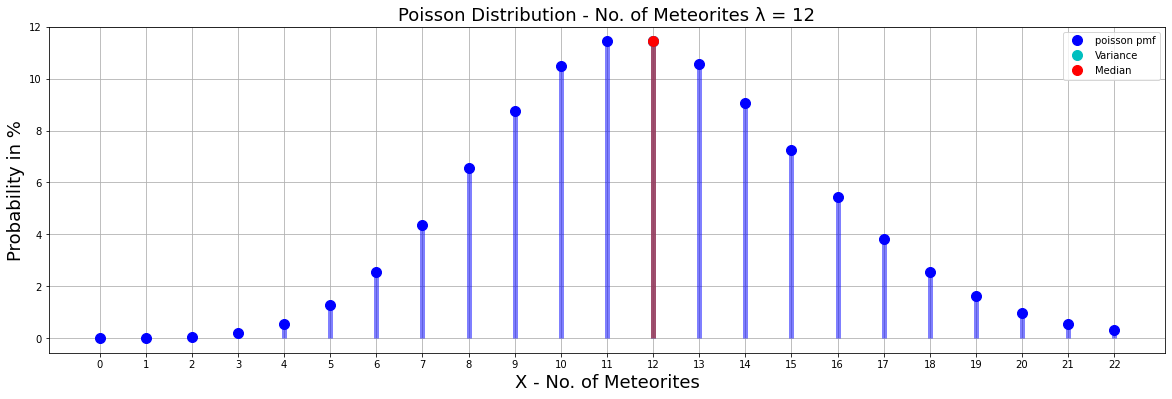

In [13]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

# Definitions
tick_increment = 1
lmbda = 12
n = 23
X = np.arange(0, n, 1)

mean, var, skew, kurt = poisson.stats(lmbda, moments='mvsk')

# PMF of the distribution in %
poisson_pd = poisson.pmf(X, lmbda) * 100

def find_threshold() :
    for index , val in enumerate(reversed(poisson_pd)):
        if val > 0.5:
            return index + 1

find_threshold()

#Finding variance by summing the CDF 50
median = 0
for i , e in enumerate(poisson_pd.cumsum()):
    if e > 50:
        median = i
        break


p_lmbda = poisson.pmf(k=var, mu=lmbda) * 100
p_median = poisson.pmf(k=median, mu=lmbda) * 100

# Plot the probability distribution
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

#ax.plot(X, poisson_pd, 'bo', ms=10, label='poisson pmf')
#PMF
plt.xlabel("X - No. of Meteorites", fontsize="18")
plt.plot(X, poisson_pd, 'bo', ms=10, label='poisson pmf')
ax.vlines(X, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

#Variance
plt.plot(var, p_lmbda, 'co', ms=10, label='Variance')
ax.vlines(var, 0, p_lmbda, colors='c', lw=5, alpha=0.5)

#Median
plt.plot(median, p_median, 'ro', ms=10, label='Median')
ax.vlines(median, 0, p_median, colors='r', lw=5, alpha=0.5)

plt.xticks(np.arange(0, n, tick_increment))
plt.title("Poisson Distribution - No. of Meteorites λ = 12", fontsize="18")

plt.ylabel("Probability in %", fontsize="18")
ax.grid(True)

plt.legend(loc='best', frameon=True)
plt.savefig('images/task_1_b.pdf')